# Laboratorio 7
 - Joaquín Puente
 - José Mérida

## Análisis del Dataset de Diabetes

## 1. Importación de librerías y dataset

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Configuración para gráficos
plt.style.use('default')
sns.set_palette("husl")
plt.rcParams['figure.figsize'] = (12, 8)

In [2]:
# Importar el dataset
df = pd.read_csv('dataset/diabetes.csv')
print(f"Dimensiones del dataset: {df.shape}")
df.head()

Dimensiones del dataset: (768, 9)


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


## 2. Descripción de las variables

El dataset de diabetes contiene las siguientes variables:

- **Pregnancies**: Número de veces que ha estado embarazada
- **Glucose**: Concentración de glucosa en plasma
- **BloodPressure**: Presión de sangre diastólica (mm Hg)
- **SkinThickness**: Grosor del pliegue cutáneo del Tríceps (mm)
- **Insulin**: Suero de insulina 2-Horas (mu U/ml)
- **BMI**: Índice de masa corporal (peso en Kg/(estatura en mts)²)
- **DiabetesPedigreeFunction**: Función de pedigree de diabetes
- **Age**: Edad en años
- **Outcome**: Diabetes o no diabetes (0 = No diabetes, 1 = Diabetes)

In [3]:
# Información general del dataset
print("Información del dataset:")
df.info()
print("\nEstadísticas descriptivas:")
df.describe()

Información del dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB

Estadísticas descriptivas:


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [4]:
# Verificar valores nulos
print("Valores nulos por columna:")
print(df.isnull().sum())

# Distribución de la variable objetivo
print("\nDistribución de la variable objetivo (Outcome):")
print(df['Outcome'].value_counts())
print(f"\nPorcentaje de casos con diabetes: {df['Outcome'].mean()*100:.2f}%")

Valores nulos por columna:
Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

Distribución de la variable objetivo (Outcome):
Outcome
0    500
1    268
Name: count, dtype: int64

Porcentaje de casos con diabetes: 34.90%


## 3. Distribuciones - Boxplots

A continuación se muestran los boxplots para visualizar las distribuciones de todas las variables numéricas:

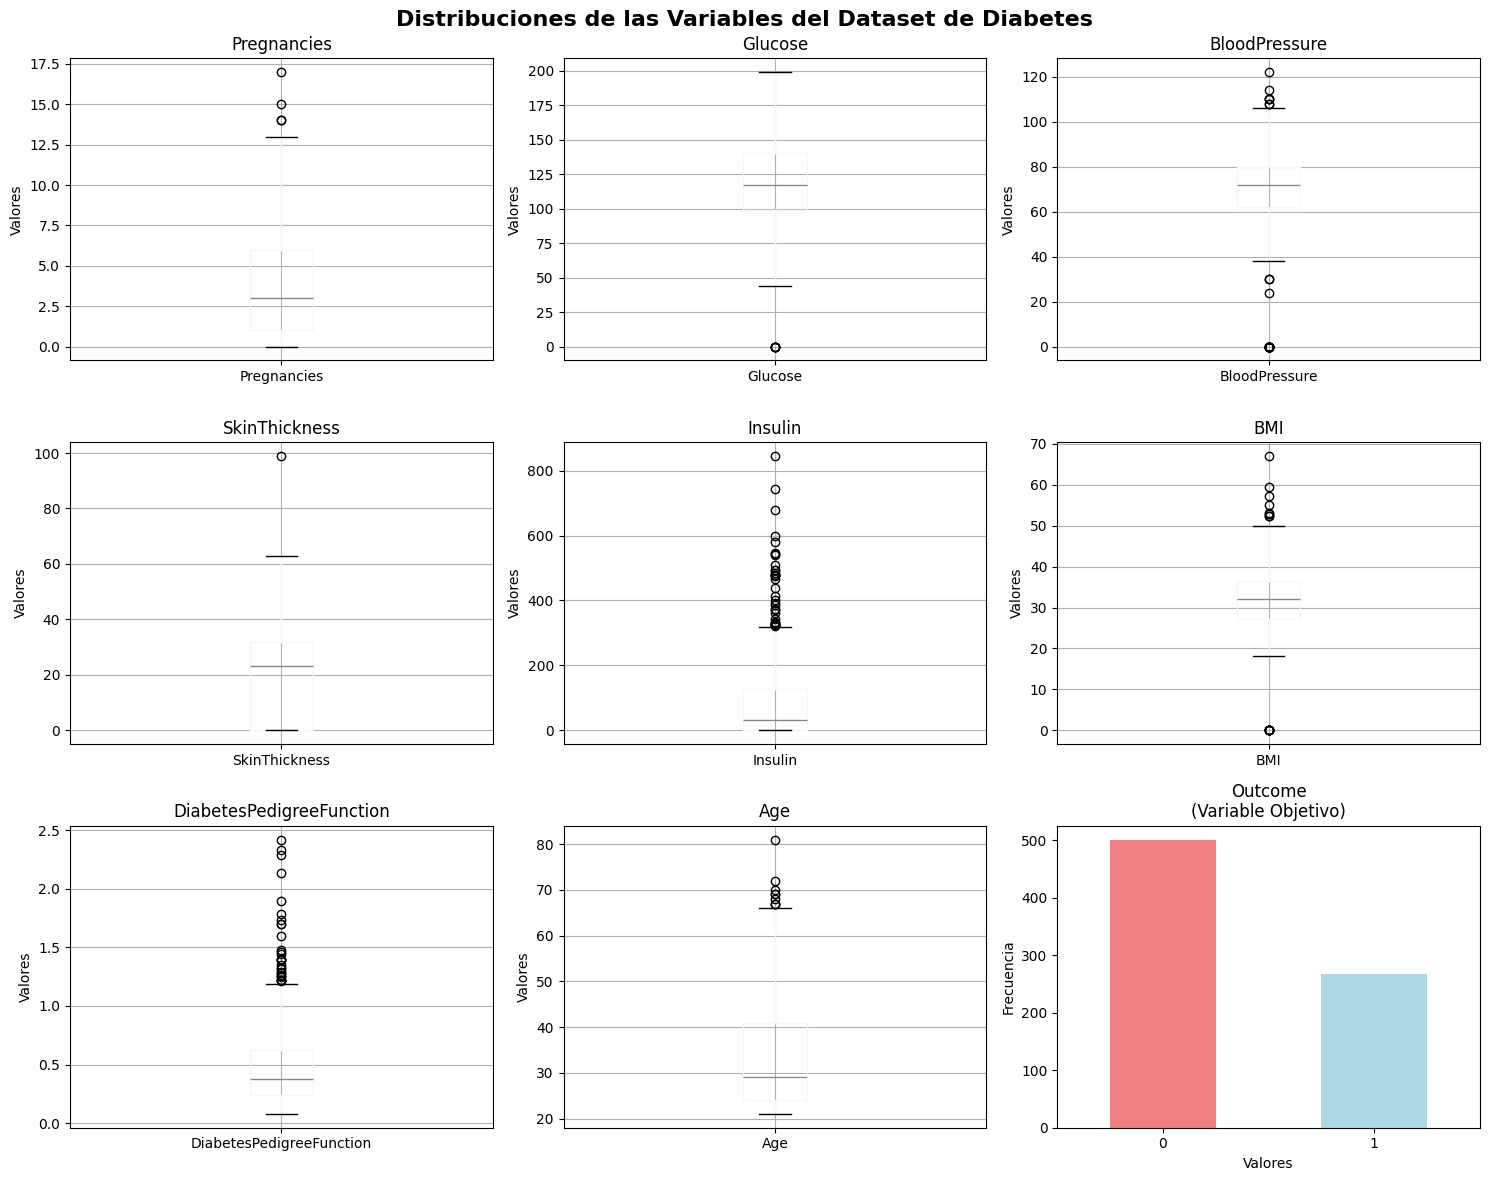

In [5]:
# Crear boxplots para todas las variables numéricas
fig, axes = plt.subplots(3, 3, figsize=(15, 12))
fig.suptitle('Distribuciones de las Variables del Dataset de Diabetes', fontsize=16, fontweight='bold')

# Lista de columnas para los boxplots
columns = df.columns.tolist()

for i, column in enumerate(columns):
    row = i // 3
    col = i % 3
    
    if column == 'Outcome':
        # Para la variable objetivo, crear un gráfico de barras
        df[column].value_counts().plot(kind='bar', ax=axes[row, col], color=['lightcoral', 'lightblue'])
        axes[row, col].set_title(f'{column}\n(Variable Objetivo)')
        axes[row, col].set_xlabel('Valores')
        axes[row, col].set_ylabel('Frecuencia')
        axes[row, col].tick_params(axis='x', rotation=0)
    else:
        # Para variables numéricas, crear boxplot
        df.boxplot(column=column, ax=axes[row, col])
        axes[row, col].set_title(column)
        axes[row, col].set_ylabel('Valores')

plt.tight_layout()
plt.show()

/tmp/ipykernel_133106/227859161.py:16: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  bp = axes[row, col].boxplot(data_to_plot, labels=['Sin Diabetes', 'Con Diabetes'], patch_artist=True)
/tmp/ipykernel_133106/227859161.py:16: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  bp = axes[row, col].boxplot(data_to_plot, labels=['Sin Diabetes', 'Con Diabetes'], patch_artist=True)
/tmp/ipykernel_133106/227859161.py:16: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  bp = axes[row, col].boxplot(data_to_plot, labels=['Sin Diabetes', 'Con Diabetes'], patch_artist=True)
/tmp/ipykernel_133106/227859161.py:16: MatplotlibDeprecationWarn

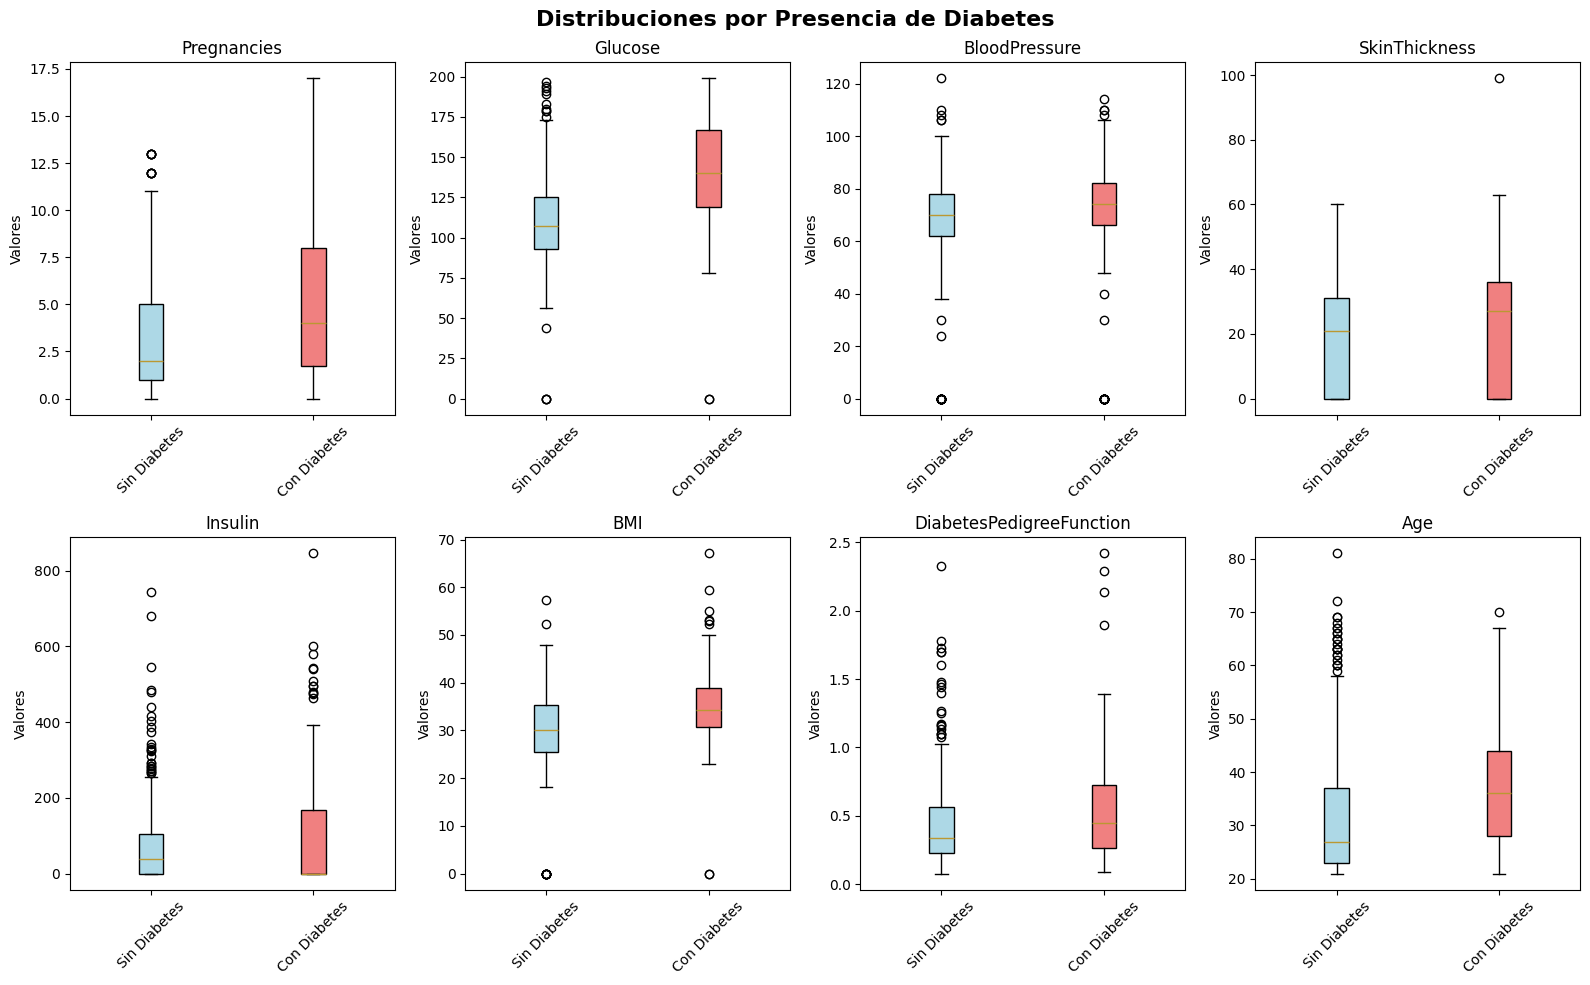

In [6]:
# Boxplots comparativos por outcome (con/sin diabetes)
fig, axes = plt.subplots(2, 4, figsize=(16, 10))
fig.suptitle('Distribuciones por Presencia de Diabetes', fontsize=16, fontweight='bold')

# Variables numéricas (excluyendo Outcome)
numeric_columns = [col for col in df.columns if col != 'Outcome']

for i, column in enumerate(numeric_columns):
    row = i // 4
    col = i % 4
    
    # Crear datos para boxplot agrupado
    data_to_plot = [df[df['Outcome'] == 0][column].dropna(), 
                    df[df['Outcome'] == 1][column].dropna()]
    
    bp = axes[row, col].boxplot(data_to_plot, labels=['Sin Diabetes', 'Con Diabetes'], patch_artist=True)
    
    # Colorear las cajas
    bp['boxes'][0].set_facecolor('lightblue')
    bp['boxes'][1].set_facecolor('lightcoral')
    
    axes[row, col].set_title(column)
    axes[row, col].set_ylabel('Valores')
    axes[row, col].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

In [7]:
# Análisis de outliers
print("Análisis de valores atípicos (outliers):")
print("="*50)

for column in numeric_columns:
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]
    
    print(f"{column}: {len(outliers)} outliers ({len(outliers)/len(df)*100:.2f}%)")

Análisis de valores atípicos (outliers):
Pregnancies: 4 outliers (0.52%)
Glucose: 5 outliers (0.65%)
BloodPressure: 45 outliers (5.86%)
SkinThickness: 1 outliers (0.13%)
Insulin: 34 outliers (4.43%)
BMI: 19 outliers (2.47%)
DiabetesPedigreeFunction: 29 outliers (3.78%)
Age: 9 outliers (1.17%)


In [8]:
# Análisis de correlaciones por grupos (con y sin diabetes)
print("Análisis de correlaciones por grupos:")
print("="*50)

diabetes_group = df[df['Outcome'] == 1].drop('Outcome', axis=1)
no_diabetes_group = df[df['Outcome'] == 0].drop('Outcome', axis=1)

print("Correlaciones en el grupo CON diabetes:")
print("-"*40)
diabetes_corr = diabetes_group.corr()
strong_corr_diabetes = []
for i in range(len(diabetes_corr.columns)):
    for j in range(i+1, len(diabetes_corr.columns)):
        corr_val = diabetes_corr.iloc[i, j]
        if abs(corr_val) > 0.3:
            strong_corr_diabetes.append((diabetes_corr.columns[i], diabetes_corr.columns[j], corr_val))

strong_corr_diabetes.sort(key=lambda x: abs(x[2]), reverse=True)
for var1, var2, corr in strong_corr_diabetes[:5]:
    print(f"{var1} - {var2}: {corr:.3f}")

print("\nCorrelaciones en el grupo SIN diabetes:")
print("-"*40)
no_diabetes_corr = no_diabetes_group.corr()
strong_corr_no_diabetes = []
for i in range(len(no_diabetes_corr.columns)):
    for j in range(i+1, len(no_diabetes_corr.columns)):
        corr_val = no_diabetes_corr.iloc[i, j]
        if abs(corr_val) > 0.3:
            strong_corr_no_diabetes.append((no_diabetes_corr.columns[i], no_diabetes_corr.columns[j], corr_val))

strong_corr_no_diabetes.sort(key=lambda x: abs(x[2]), reverse=True)
for var1, var2, corr in strong_corr_no_diabetes[:5]:
    print(f"{var1} - {var2}: {corr:.3f}")

Análisis de correlaciones por grupos:
Correlaciones en el grupo CON diabetes:
----------------------------------------
SkinThickness - Insulin: 0.457
Pregnancies - Age: 0.445
SkinThickness - BMI: 0.312

Correlaciones en el grupo SIN diabetes:
----------------------------------------
Pregnancies - Age: 0.573
SkinThickness - BMI: 0.439
SkinThickness - Insulin: 0.413
BloodPressure - BMI: 0.363
Glucose - Insulin: 0.353


/tmp/ipykernel_133106/2329598674.py:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x=var2, y=var1, ax=axes[row, col], palette=['lightblue', 'lightcoral'])
/tmp/ipykernel_133106/2329598674.py:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x=var2, y=var1, ax=axes[row, col], palette=['lightblue', 'lightcoral'])
/tmp/ipykernel_133106/2329598674.py:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x=var2, y=var1, ax=axes[row, col], palette=['lightblue', 'lightcoral'])


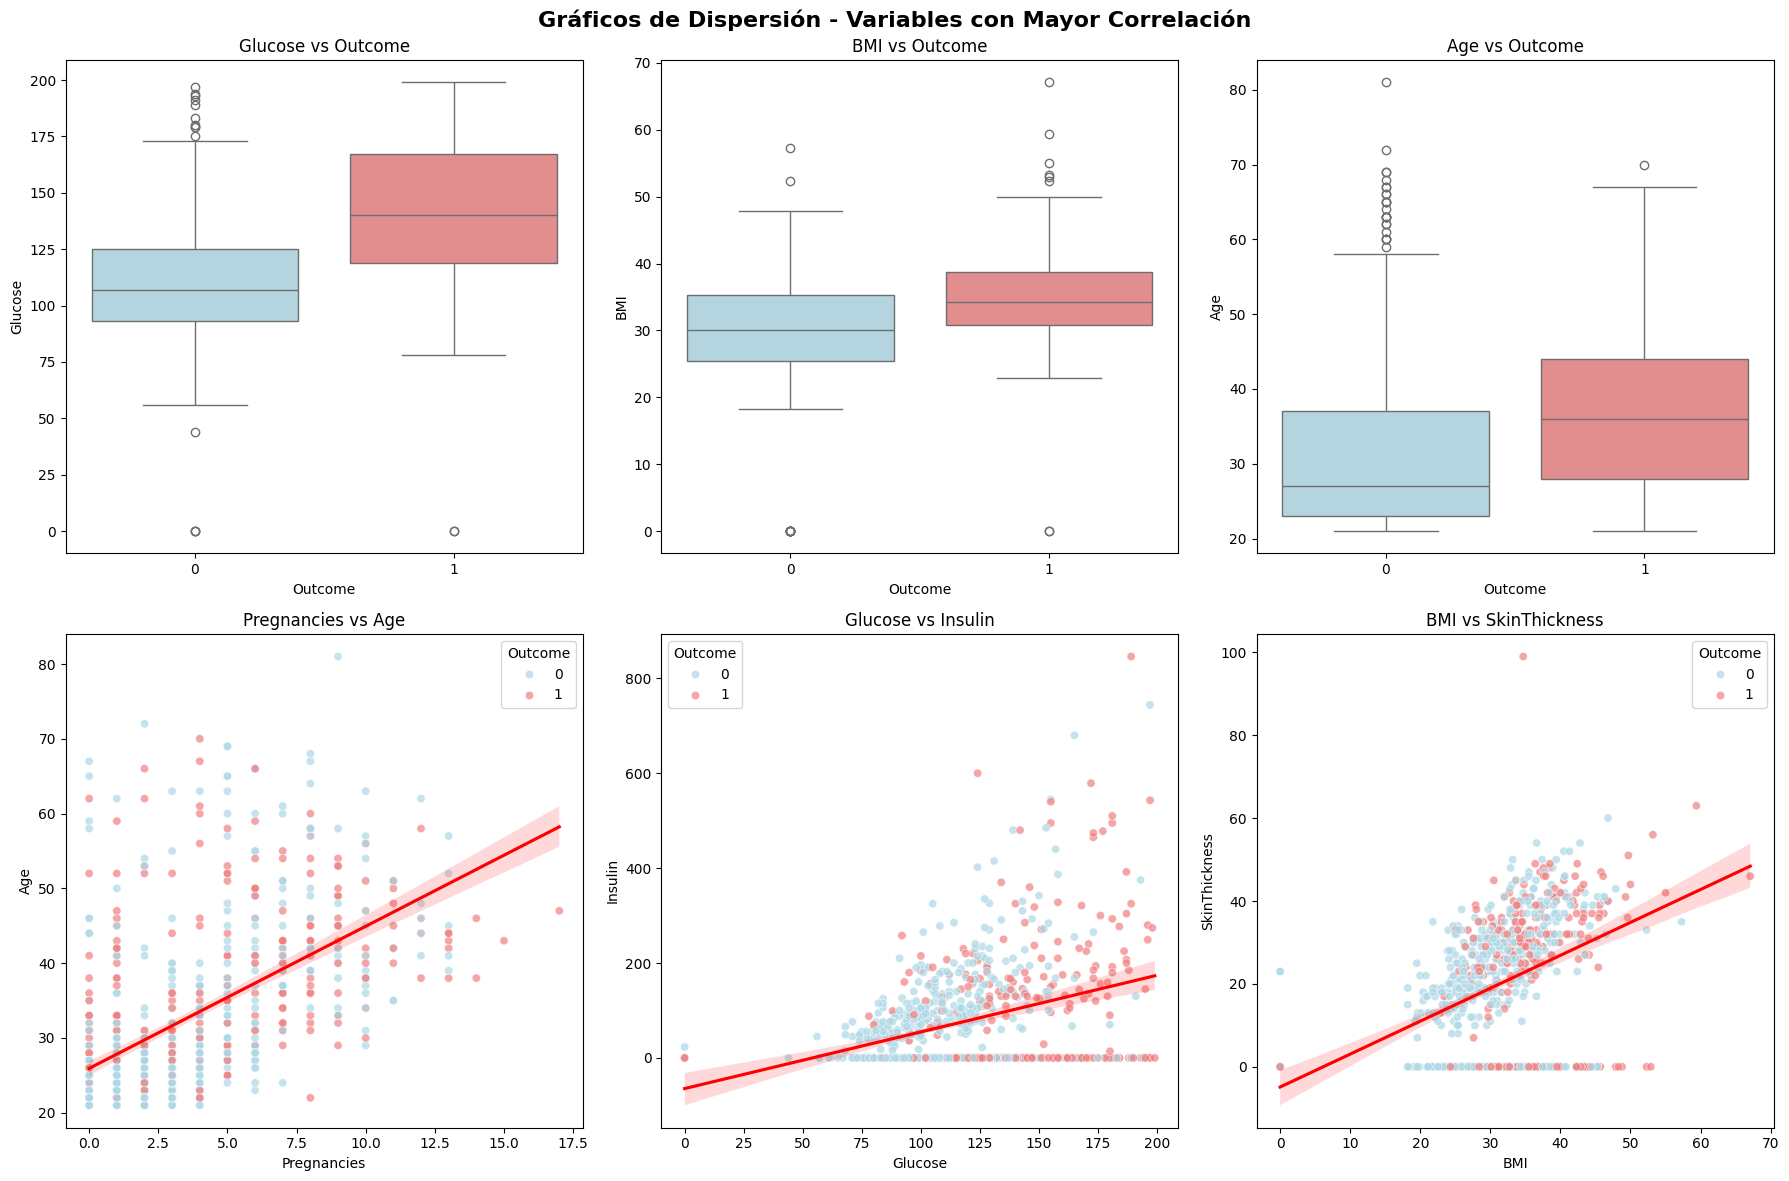

In [9]:
# Gráficos de dispersión específicos para las variables más correlacionadas
fig, axes = plt.subplots(2, 3, figsize=(18, 12))
fig.suptitle('Gráficos de Dispersión - Variables con Mayor Correlación', fontsize=16, fontweight='bold')

# Seleccionar pares de variables con correlaciones interesantes
scatter_pairs = [
    ('Glucose', 'Outcome'),
    ('BMI', 'Outcome'),
    ('Age', 'Outcome'),
    ('Pregnancies', 'Age'),
    ('Glucose', 'Insulin'),
    ('BMI', 'SkinThickness')
]

for i, (var1, var2) in enumerate(scatter_pairs):
    row = i // 3
    col = i % 3

    if var2 == 'Outcome':
        # Para outcome, crear boxplot
        sns.boxplot(data=df, x=var2, y=var1, ax=axes[row, col], palette=['lightblue', 'lightcoral'])
        axes[row, col].set_title(f'{var1} vs {var2}')
    else:
        # Para variables continuas, crear scatter plot
        sns.scatterplot(data=df, x=var1, y=var2, hue='Outcome',
                       palette=['lightblue', 'lightcoral'], alpha=0.7, ax=axes[row, col])
        axes[row, col].set_title(f'{var1} vs {var2}')

        # Agregar línea de tendencia
        sns.regplot(data=df, x=var1, y=var2, scatter=False, ax=axes[row, col], color='red')

plt.tight_layout()
plt.show()

## 4. Gráficos de dispersión

<Figure size 2000x1600 with 0 Axes>

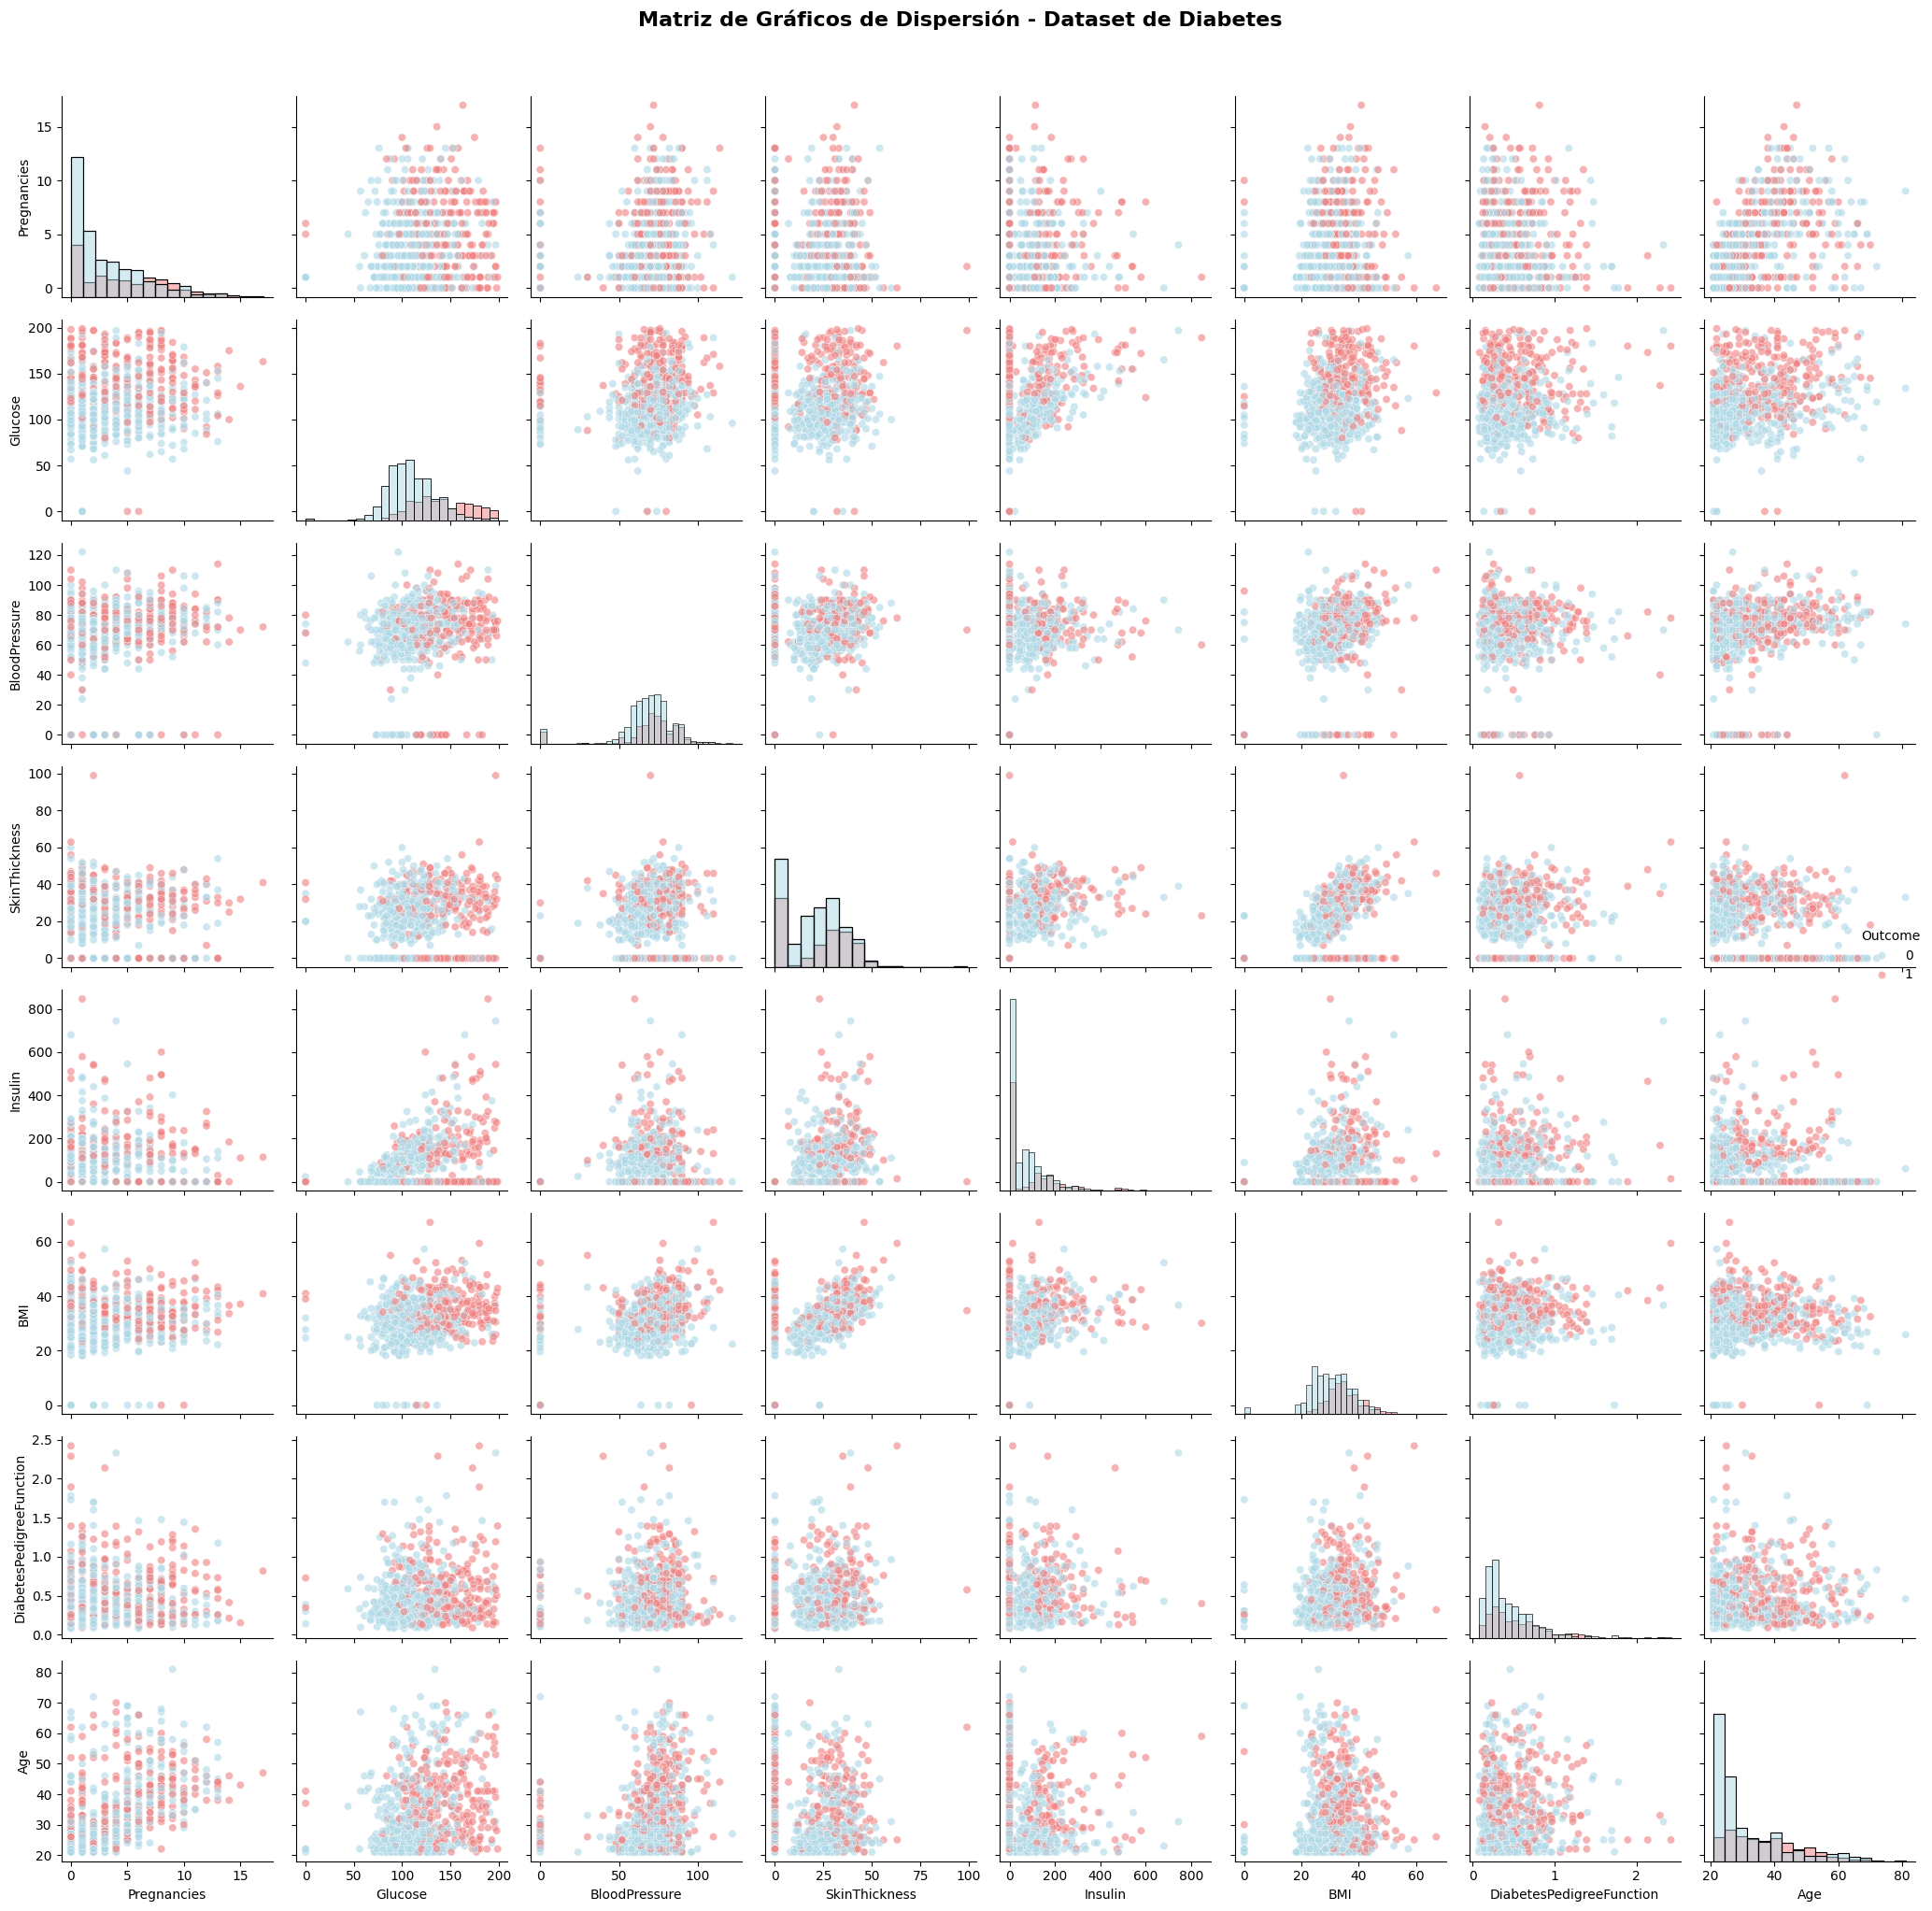

In [10]:
# Crear gráfico de dispersión para todas las combinaciones de variables
plt.figure(figsize=(20, 16))
sns.pairplot(df, hue='Outcome', palette=['lightblue', 'lightcoral'],
             plot_kws={'alpha': 0.6}, diag_kind='hist')
plt.suptitle('Matriz de Gráficos de Dispersión - Dataset de Diabetes',
             fontsize=16, fontweight='bold', y=1.02)
plt.tight_layout()
plt.show()

## 5. Matríz de correlación

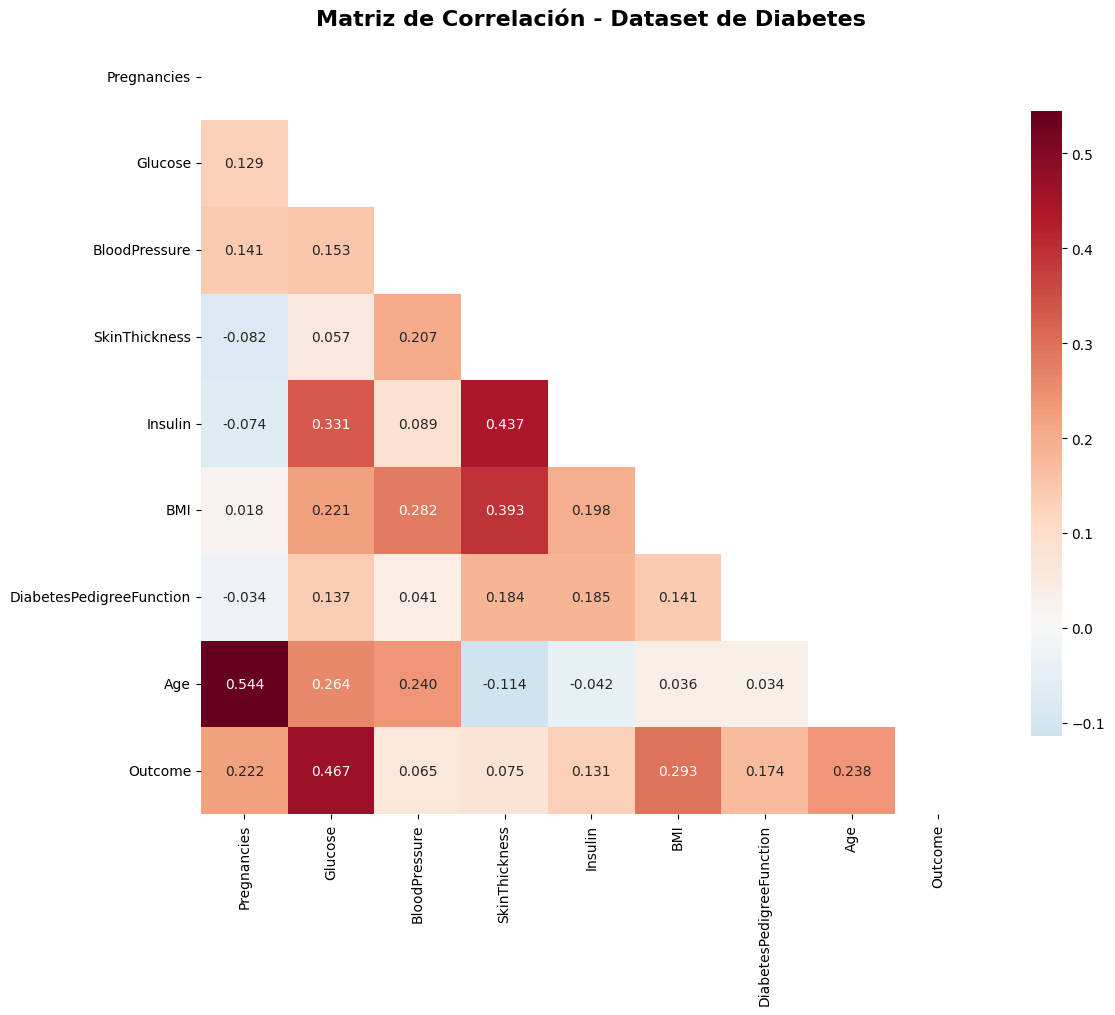

Correlaciones con la variable objetivo (Outcome):
Glucose: 0.467
BMI: 0.293
Age: 0.238
Pregnancies: 0.222
DiabetesPedigreeFunction: 0.174
Insulin: 0.131
SkinThickness: 0.075
BloodPressure: 0.065

Variables con mayor correlación positiva: ['Glucose', 'BMI', 'Age']
Variables con mayor correlación negativa: ['Insulin', 'SkinThickness', 'BloodPressure']


In [11]:
# Calcular la matriz de correlación
correlation_matrix = df.corr()

# Crear el heatmap de la matriz de correlación
plt.figure(figsize=(12, 10))
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))
sns.heatmap(correlation_matrix,
            mask=mask,
            annot=True,
            cmap='RdBu_r',
            center=0,
            square=True,
            fmt='.3f',
            cbar_kws={"shrink": .8})
plt.title('Matriz de Correlación - Dataset de Diabetes', fontsize=16, fontweight='bold')
plt.tight_layout()
plt.show()

# Mostrar las correlaciones más fuertes con la variable objetivo
print("Correlaciones con la variable objetivo (Outcome):")
print("="*50)
outcome_corr = correlation_matrix['Outcome'].drop('Outcome').sort_values(key=abs, ascending=False)
for var, corr in outcome_corr.items():
    print(f"{var}: {corr:.3f}")

print(f"\nVariables con mayor correlación positiva: {outcome_corr.head(3).index.tolist()}")
print(f"Variables con mayor correlación negativa: {outcome_corr.tail(3).index.tolist()}")